# Understanding the pharmacogenics of microdosing using Topic Modelling

# Data Collection and Cleaning 

For data collection the pushshift api was utilised to download all posts and comments from the subreddit r/microdosing . Both files were downloaded as separate json files

The following script was created to download the posts - https://github.com/guneetsinghchatha/subreddit_downloader

# For Reddit Posts

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np

**Leading the file**

In [ ]:
df = pd.read_json('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/Posts.JSON',lines = True)

**Displaying all the columns**

In [ ]:
df.columns.tolist()

['all_awardings',
 'allow_live_comments',
 'author',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_text',
 'author_flair_type',
 'author_fullname',
 'author_is_blocked',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gildings',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_richtext',
 'link_flair_template_id',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'pwls',
 'retrieved_on',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_subscribers',
 'subreddit_type',
 'suggested_sort',
 'thumbnail',
 'title

**Keeping only the selected columns**

In [ ]:
list = ['id','selftext','title','link_flair_text','created_utc']

In [ ]:
df2 = df[list]

**Converting all text data to strings**

In [ ]:
df2['selftext'] = df2['selftext'].apply(str)
df2['title'] = df2['title'].apply(str)
df2['link_flair_text'] = df2['link_flair_text'].apply(str)

/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1091482382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['selftext'] = df2['selftext'].apply(str)
/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1091482382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['title'] = df2['title'].apply(str)
/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1091482382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

**Merging the post title and post content into one column and removing other columns**

In [ ]:
df2['paper_text'] = df2['title'] + " " + df2['selftext']

/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1815562346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['paper_text'] = df2['title'] + " " + df2['selftext']


In [ ]:
final_headers = ['id','paper_text','link_flair_text','created_utc']

In [ ]:
df3 = df2[final_headers]

**Converting UTC time format for our analysis**

In [ ]:
df3['created_utc'] = pd.to_datetime(df3['created_utc'],  unit='s')
df3['created_utc_str'] = df3['created_utc'].dt.strftime('%Y-%m-%d')

/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1701387166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['created_utc'] = pd.to_datetime(df3['created_utc'],  unit='s')
/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/1701387166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['created_utc_str'] = df3['created_utc'].dt.strftime('%Y-%m-%d')


**Adding prefix t3 as we will require this as an index for our join with comments**

In [ ]:
df3['link_id'] = "t3_" + df3['id']

**Final Dataframe**

In [ ]:
df3

,id,paper_text,link_flair_text,created_utc,created_utc_str,link_id
0,qic2l7,Dosage liverty caps Probbly a common question....,Question: Psilocybin,2021-10-29 12:49:15,2021-10-29,t3_qic2l7
1,qibj5e,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,2021-10-29 12:19:02,2021-10-29,t3_qibj5e
2,qibifv,Can Truffles change their effects after they g...,Question: Psilocybin,2021-10-29 12:17:47,2021-10-29,t3_qibifv
3,qiahat,Microdosing to stop overconsuming cannabis I a...,Question: LSD,2021-10-29 11:15:55,2021-10-29,t3_qiahat
4,qi8zia,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,2021-10-29 09:33:24,2021-10-29,t3_qi8zia
...,...,...,...,...,...,...
30955,1xojbz,Perks of microdosing LSD? Whats to gain from i...,nan,2014-02-12 04:30:05,2014-02-12,t3_1xojbz
30956,1wwiaq,question about microdosing and booze... hey fr...,nan,2014-02-03 16:41:34,2014-02-03,t3_1wwiaq
30957,1wj566,"Is it possible to ""microdose"" marijuana ? If t...",nan,2014-01-30 04:39:49,2014-01-30,t3_1wj566
30958,1wdj63,Advice on microdosing mushrooms? Throughout my...,nan,2014-01-28 15:36:34,2014-01-28,t3_1wdj63


# For Comments

In [ ]:
df_comments  = pd.read_json('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/mComments.JSON',lines=True)

In [ ]:
df_comments 

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,editable,steward_reports,updated_utc,author_created_utc,nest_level,reply_delay,user_removed,mod_removed,rte_mode,permalink_url
0,[],0.0,NaN,Ramstang95,None,NaN,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],0.0,NaN,Bodacious_Chad,None,NaN,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],0.0,NaN,NeuronsToNirvana,None,NaN,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],0.0,NaN,nonicknamenelly,None,NaN,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],0.0,NaN,Cacti_92,None,NaN,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340830,NaN,NaN,NaN,ruseweek,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.308161e+09,4.0,2629.0,NaN,NaN,NaN,NaN
340831,NaN,NaN,NaN,jedisjumphigh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.305510e+09,3.0,1824.0,NaN,NaN,NaN,NaN
340832,NaN,NaN,NaN,ruseweek,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.308161e+09,2.0,444.0,NaN,NaN,NaN,NaN
340833,NaN,NaN,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1736.0,1.0,NaN,NaN,NaN


In [ ]:
df_comments.columns.to_list()

['all_awardings',
 'archived',
 'associated_award',
 'author',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_patreon_flair',
 'author_premium',
 'body',
 'body_sha1',
 'can_gild',
 'collapsed',
 'collapsed_because_crowd_control',
 'collapsed_reason',
 'collapsed_reason_code',
 'comment_type',
 'controversiality',
 'created_utc',
 'distinguished',
 'gilded',
 'gildings',
 'id',
 'is_submitter',
 'link_id',
 'locked',
 'no_follow',
 'parent_id',
 'permalink',
 'retrieved_utc',
 'score',
 'score_hidden',
 'send_replies',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_name_prefixed',
 'subreddit_type',
 'top_awarded_type',
 'total_awards_received',
 'treatment_tags',
 'unrepliable_reason',
 'awarders',
 'retrieved_on',
 'author_cakeday',
 'edited',
 'editable',
 'steward_reports',
 'updated_utc',
 'author_created

**Creating an index for the columns we need for our analysis and removing all un-necessary columns**

In [ ]:
index_comments = ['parent_id','id','link_id','body','author']

In [ ]:
dfc = df_comments[index_comments]

In [ ]:
dfc

,parent_id,id,link_id,body,author
0,t1_hihyv9r,hiii1xy,t3_qhqhj1,This is all good but do you cycle m.d.'ing fo...,Ramstang95
1,t1_hii3r64,hiigkf1,t3_qi5td0,That 1oz has to be fresh. Dried mushrooms lose...,Bodacious_Chad
2,t1_hihejey,hiievkr,t3_qhlcdz,Psychedelics did show great promise for mental...,NeuronsToNirvana
3,t3_qhqhj1,hiid0mq,t3_qhqhj1,I wouldn’t necessarily say it is the placebo e...,nonicknamenelly
4,t1_hiiaijm,hiibo5e,t3_qibj5e,"I’m not trying to prove them wrong, the answer...",Cacti_92
...,...,...,...,...,...
340830,t1_cct17iw,cct2ac9,t3_1ol4sl,".1 to .4 grams. At the low end, you're below t...",ruseweek
340831,t1_cct0g5g,cct17iw,t3_1ol4sl,That's fine I'm still wondering how much 100-4...,jedisjumphigh
340832,t1_cct09pk,cct0g5g,t3_1ol4sl,I was referring to the psilocin/psilocybin alk...,ruseweek
340833,t3_1ol4sl,cct0f52,t3_1ol4sl,[deleted],[deleted]


**Converting body to string**

In [ ]:
dfc['body'] = dfc['body'].apply(str)

/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1291/9555378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['body'] = dfc['body'].apply(str)


In [ ]:
dfc

,parent_id,id,link_id,body,author
0,t1_hihyv9r,hiii1xy,t3_qhqhj1,This is all good but do you cycle m.d.'ing fo...,Ramstang95
1,t1_hii3r64,hiigkf1,t3_qi5td0,That 1oz has to be fresh. Dried mushrooms lose...,Bodacious_Chad
2,t1_hihejey,hiievkr,t3_qhlcdz,Psychedelics did show great promise for mental...,NeuronsToNirvana
3,t3_qhqhj1,hiid0mq,t3_qhqhj1,I wouldn’t necessarily say it is the placebo e...,nonicknamenelly
4,t1_hiiaijm,hiibo5e,t3_qibj5e,"I’m not trying to prove them wrong, the answer...",Cacti_92
...,...,...,...,...,...
340830,t1_cct17iw,cct2ac9,t3_1ol4sl,".1 to .4 grams. At the low end, you're below t...",ruseweek
340831,t1_cct0g5g,cct17iw,t3_1ol4sl,That's fine I'm still wondering how much 100-4...,jedisjumphigh
340832,t1_cct09pk,cct0g5g,t3_1ol4sl,I was referring to the psilocin/psilocybin alk...,ruseweek
340833,t3_1ol4sl,cct0f52,t3_1ol4sl,[deleted],[deleted]


**Removing all moderator posts**

In [ ]:
to_drop = ['AutoModerator']
dfd = dfc[~dfc['author'].isin(to_drop)]

**Merging all comments to master comment tree**

In [ ]:
dfc2 = dfd.groupby(['parent_id', 'link_id'])['body'].apply(' '.join).reset_index()

**Merging comment tree to top level comment**

In [ ]:
dfc3 = dfc2.groupby(['link_id'])['body'].apply(' '.join).reset_index()

In [ ]:
dfc3

,link_id,body
0,t3_1ol4sl,I was referring to the psilocin/psilocybin alk...
1,t3_1olxep,I get nausea a lot from psychedelics and latel...
2,t3_1oqjdw,I personally only take them for specific situa...
3,t3_1oqzcu,Most report that it has a dysphoric side to it...
4,t3_1oxco2,[deleted] My advice is to carefully ask around...
...,...,...
30934,t3_qi7ev2,Which do you pick if you are 30 or 40 years ol...
30935,t3_qi8zia,Please read our Wiki and other links in the au...
30936,t3_qiahat,Not md but I know someone who quit smoking wee...
30937,t3_qibifv,"Yes, **fresh** mushrooms/[truffles](https://ww..."


# Merging posts and comments

In [ ]:
pandc = pd.merge(df3, dfc3, on="link_id", how= 'left')

In [ ]:
pandc

,id,paper_text,link_flair_text,created_utc,created_utc_str,link_id,body
0,qic2l7,Dosage liverty caps Probbly a common question....,Question: Psilocybin,2021-10-29 12:49:15,2021-10-29,t3_qic2l7,NaN
1,qibj5e,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,2021-10-29 12:19:02,2021-10-29,t3_qibj5e,"I’m not trying to prove them wrong, the answer..."
2,qibifv,Can Truffles change their effects after they g...,Question: Psilocybin,2021-10-29 12:17:47,2021-10-29,t3_qibifv,"Yes, **fresh** mushrooms/[truffles](https://ww..."
3,qiahat,Microdosing to stop overconsuming cannabis I a...,Question: LSD,2021-10-29 11:15:55,2021-10-29,t3_qiahat,Not md but I know someone who quit smoking wee...
4,qi8zia,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,2021-10-29 09:33:24,2021-10-29,t3_qi8zia,Please read our Wiki and other links in the au...
...,...,...,...,...,...,...,...
30955,1xojbz,Perks of microdosing LSD? Whats to gain from i...,nan,2014-02-12 04:30:05,2014-02-12,t3_1xojbz,[deleted] Apart from studying psych (I study c...
30956,1wwiaq,question about microdosing and booze... hey fr...,nan,2014-02-03 16:41:34,2014-02-03,t3_1wwiaq,[deleted] well since you are combining drinkin...
30957,1wj566,"Is it possible to ""microdose"" marijuana ? If t...",nan,2014-01-30 04:39:49,2014-01-30,t3_1wj566,Any source for this? &gt; Any source\n\nNot on...
30958,1wdj63,Advice on microdosing mushrooms? Throughout my...,nan,2014-01-28 15:36:34,2014-01-28,t3_1wdj63,When I microdosed 600mg of regular cubensis on...


**Removing all na columns**

In [ ]:
pandc = pandc.fillna('')

**Merging comment master to posts**

In [ ]:
pandc["posts"] = pandc["paper_text"] + " " + pandc["body"]

**Keeping only the required columns**

In [ ]:
merged_headers = ['link_id','created_utc','created_utc_str','posts','link_flair_text']

In [ ]:
dataset = pandc[merged_headers]

In [ ]:
dataset

,link_id,created_utc,created_utc_str,posts,link_flair_text
0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin
1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question
2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin
3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD
4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question
...,...,...,...,...,...
30955,t3_1xojbz,2014-02-12 04:30:05,2014-02-12,Perks of microdosing LSD? Whats to gain from i...,nan
30956,t3_1wwiaq,2014-02-03 16:41:34,2014-02-03,question about microdosing and booze... hey fr...,nan
30957,t3_1wj566,2014-01-30 04:39:49,2014-01-30,"Is it possible to ""microdose"" marijuana ? If t...",nan
30958,t3_1wdj63,2014-01-28 15:36:34,2014-01-28,Advice on microdosing mushrooms? Throughout my...,nan


**Saving to csv**

In [ ]:
dataset.to_csv('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/MD_reports.csv')

# Initialisation

**Importing Libraries**

In [18]:
import numpy as np
import pandas as pd
import json
import glob
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import seaborn as sns
import matplotlib as plt
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import contractions
import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Importing stopwords**

In [19]:
stopwords = stopwords.words("english")

**Importing File**

In [20]:
papers = pd.read_csv('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/MD_reports.csv')

In [21]:
papers

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question
...,...,...,...,...,...,...
30955,30955,t3_1xojbz,2014-02-12 04:30:05,2014-02-12,Perks of microdosing LSD? Whats to gain from i...,NaN
30956,30956,t3_1wwiaq,2014-02-03 16:41:34,2014-02-03,question about microdosing and booze... hey fr...,NaN
30957,30957,t3_1wj566,2014-01-30 04:39:49,2014-01-30,"Is it possible to ""microdose"" marijuana ? If t...",NaN
30958,30958,t3_1wdj63,2014-01-28 15:36:34,2014-01-28,Advice on microdosing mushrooms? Throughout my...,NaN


# Text pre-processing

**Expanding Contractions**

In [22]:
papers['no_contract'] = papers['posts'].apply(lambda x: [contractions.fix(word) for word in x.split()])
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,no_contract
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,"[Dosage, liverty, caps, Probbly, a, common, qu..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,"[Psilocybin, mushroom, How, do, you, find, out..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,"[Can, Truffles, change, their, effects, after,..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,"[Microdosing, to, stop, overconsuming, cannabi..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"[How, to, start, microdosing, ?, Hi,, everyone..."


In [23]:
papers['posts_str'] = [' '.join(map(str, l)) for l in papers['no_contract']]
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,no_contract,posts_str
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ..."


**Tokenizing our words**

In [24]:
papers['tokenized'] = papers['posts_str'].apply(word_tokenize)
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,no_contract,posts_str,tokenized
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo..."


**Conversion to Lowercase**

In [25]:
papers['lower'] = papers['tokenized'].apply(lambda x: [word.lower() for word in x])
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,no_contract,posts_str,tokenized,lower
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo..."


**Removing Punctuations**

In [26]:
punc = string.punctuation
papers['no_punc'] = papers['lower'].apply(lambda x: [word for word in x if word not in punc])
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,no_contract,posts_str,tokenized,lower,no_punc
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo...","[how, to, start, microdosing, hi, everyone, i,..."


**Removing stopwords**

In [42]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
stop_words = set(stopwords.words('english'))
papers['stopwords_removed'] = papers['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,no_contract,posts_str,tokenized,lower,no_punc,stopwords_removed
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, common, quest..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, find, micro, dosing, ac..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[truffles, change, effects, got, mild, stood, ..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, stop, overconsuming, cannabis, c..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo...","[how, to, start, microdosing, hi, everyone, i,...","[start, microdosing, hi, everyone, curious, mi..."


**Parts of speech tagging**

In [46]:
nltk.download('averaged_perceptron_tagger')
papers['pos_tags'] = papers['stopwords_removed'].apply(nltk.tag.pos_tag)
papers.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,no_contract,posts_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, common, quest...","[(dosage, NN), (liverty, NN), (caps, NN), (pro..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, find, micro, dosing, ac...","[(psilocybin, NN), (mushroom, NN), (find, VBP)..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[truffles, change, effects, got, mild, stood, ...","[(truffles, NNS), (change, VBP), (effects, NNS..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, stop, overconsuming, cannabis, c...","[(microdosing, VBG), (stop, NN), (overconsumin..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo...","[how, to, start, microdosing, hi, everyone, i,...","[start, microdosing, hi, everyone, curious, mi...","[(start, NN), (microdosing, VBG), (hi, NN), (e..."


**Lemmatizing Words**

In [48]:
nltk.download('wordnet')
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
papers['wordnet_pos'] = papers['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
papers.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,no_contract,posts_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, common, quest...","[(dosage, NN), (liverty, NN), (caps, NN), (pro...","[(dosage, n), (liverty, n), (caps, n), (probbl..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, find, micro, dosing, ac...","[(psilocybin, NN), (mushroom, NN), (find, VBP)...","[(psilocybin, n), (mushroom, n), (find, v), (m..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[truffles, change, effects, got, mild, stood, ...","[(truffles, NNS), (change, VBP), (effects, NNS...","[(truffles, n), (change, v), (effects, n), (go..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, stop, overconsuming, cannabis, c...","[(microdosing, VBG), (stop, NN), (overconsumin...","[(microdosing, v), (stop, n), (overconsuming, ..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo...","[how, to, start, microdosing, hi, everyone, i,...","[start, microdosing, hi, everyone, curious, mi...","[(start, NN), (microdosing, VBG), (hi, NN), (e...","[(start, n), (microdosing, v), (hi, n), (every..."


In [54]:
wnl = WordNetLemmatizer()
papers['lemmatized'] = papers['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
papers.head()

,Unnamed: 0,link_id,created_utc,created_utc_str,posts,link_flair_text,no_contract,posts_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,"[Dosage, liverty, caps, Probbly, a, common, qu...",Dosage liverty caps Probbly a common question....,"[Dosage, liverty, caps, Probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, a, common, qu...","[dosage, liverty, caps, probbly, common, quest...","[(dosage, NN), (liverty, NN), (caps, NN), (pro...","[(dosage, n), (liverty, n), (caps, n), (probbl...","[dosage, liverty, cap, probbly, common, questi..."
1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,"[Psilocybin, mushroom, How, do, you, find, out...",Psilocybin mushroom How do you find out if mic...,"[Psilocybin, mushroom, How, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, how, do, you, find, out...","[psilocybin, mushroom, find, micro, dosing, ac...","[(psilocybin, NN), (mushroom, NN), (find, VBP)...","[(psilocybin, n), (mushroom, n), (find, v), (m...","[psilocybin, mushroom, find, micro, dose, actu..."
2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,"[Can, Truffles, change, their, effects, after,...",Can Truffles change their effects after they g...,"[Can, Truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[can, truffles, change, their, effects, after,...","[truffles, change, effects, got, mild, stood, ...","[(truffles, NNS), (change, VBP), (effects, NNS...","[(truffles, n), (change, v), (effects, n), (go...","[truffle, change, effect, get, mild, stand, lo..."
3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,"[Microdosing, to, stop, overconsuming, cannabi...",Microdosing to stop overconsuming cannabis I a...,"[Microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, to, stop, overconsuming, cannabi...","[microdosing, stop, overconsuming, cannabis, c...","[(microdosing, VBG), (stop, NN), (overconsumin...","[(microdosing, v), (stop, n), (overconsuming, ...","[microdosing, stop, overconsuming, cannabis, c..."
4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"[How, to, start, microdosing, ?, Hi,, everyone...","How to start microdosing ? Hi, everyone, I am ...","[How, to, start, microdosing, ?, Hi, ,, everyo...","[how, to, start, microdosing, ?, hi, ,, everyo...","[how, to, start, microdosing, hi, everyone, i,...","[start, microdosing, hi, everyone, curious, mi...","[(start, NN), (microdosing, VBG), (hi, NN), (e...","[(start, n), (microdosing, v), (hi, n), (every...","[start, microdosing, hi, everyone, curious, mi..."


In [55]:
papers.to_csv('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/microdosing_scrape_clean.csv')

# Exploratory Data Analysis

**Keeping only the required columns**

In [72]:
md_submissions = pd.read_csv('/Users/guneetsingh/Desktop/Python/Git_Projects/Topics_Microdosing/microdosing_scrape_clean.csv')
md_submissions.head(5)

,Unnamed: 0,Unnamed: 0.1,link_id,created_utc,created_utc_str,posts,link_flair_text,no_contract,posts_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,0,0,t3_qic2l7,2021-10-29 12:49:15,2021-10-29,Dosage liverty caps Probbly a common question....,Question: Psilocybin,"['Dosage', 'liverty', 'caps', 'Probbly', 'a', ...",Dosage liverty caps Probbly a common question....,"['Dosage', 'liverty', 'caps', 'Probbly', 'a', ...","['dosage', 'liverty', 'caps', 'probbly', 'a', ...","['dosage', 'liverty', 'caps', 'probbly', 'a', ...","['dosage', 'liverty', 'caps', 'probbly', 'comm...","[('dosage', 'NN'), ('liverty', 'NN'), ('caps',...","[('dosage', 'n'), ('liverty', 'n'), ('caps', '...","['dosage', 'liverty', 'cap', 'probbly', 'commo..."
1,1,1,t3_qibj5e,2021-10-29 12:19:02,2021-10-29,Psilocybin mushroom How do you find out if mic...,Getting Started/Newbie Question,"['Psilocybin', 'mushroom', 'How', 'do', 'you',...",Psilocybin mushroom How do you find out if mic...,"['Psilocybin', 'mushroom', 'How', 'do', 'you',...","['psilocybin', 'mushroom', 'how', 'do', 'you',...","['psilocybin', 'mushroom', 'how', 'do', 'you',...","['psilocybin', 'mushroom', 'find', 'micro', 'd...","[('psilocybin', 'NN'), ('mushroom', 'NN'), ('f...","[('psilocybin', 'n'), ('mushroom', 'n'), ('fin...","['psilocybin', 'mushroom', 'find', 'micro', 'd..."
2,2,2,t3_qibifv,2021-10-29 12:17:47,2021-10-29,Can Truffles change their effects after they g...,Question: Psilocybin,"['Can', 'Truffles', 'change', 'their', 'effect...",Can Truffles change their effects after they g...,"['Can', 'Truffles', 'change', 'their', 'effect...","['can', 'truffles', 'change', 'their', 'effect...","['can', 'truffles', 'change', 'their', 'effect...","['truffles', 'change', 'effects', 'got', 'mild...","[('truffles', 'NNS'), ('change', 'VBP'), ('eff...","[('truffles', 'n'), ('change', 'v'), ('effects...","['truffle', 'change', 'effect', 'get', 'mild',..."
3,3,3,t3_qiahat,2021-10-29 11:15:55,2021-10-29,Microdosing to stop overconsuming cannabis I a...,Question: LSD,"['Microdosing', 'to', 'stop', 'overconsuming',...",Microdosing to stop overconsuming cannabis I a...,"['Microdosing', 'to', 'stop', 'overconsuming',...","['microdosing', 'to', 'stop', 'overconsuming',...","['microdosing', 'to', 'stop', 'overconsuming',...","['microdosing', 'stop', 'overconsuming', 'cann...","[('microdosing', 'VBG'), ('stop', 'NN'), ('ove...","[('microdosing', 'v'), ('stop', 'n'), ('overco...","['microdosing', 'stop', 'overconsuming', 'cann..."
4,4,4,t3_qi8zia,2021-10-29 09:33:24,2021-10-29,"How to start microdosing ? Hi, everyone,\n\nI'...",Getting Started/Newbie Question,"['How', 'to', 'start', 'microdosing', '?', 'Hi...","How to start microdosing ? Hi, everyone, I am ...","['How', 'to', 'start', 'microdosing', '?', 'Hi...","['how', 'to', 'start', 'microdosing', '?', 'hi...","['how', 'to', 'start', 'microdosing', 'hi', 'e...","['start', 'microdosing', 'hi', 'everyone', 'cu...","[('start', 'NN'), ('microdosing', 'VBG'), ('hi...","[('start', 'n'), ('microdosing', 'v'), ('hi', ...","['start', 'microdosing', 'hi', 'everyone', 'cu..."


In [73]:
md_submissions = md_submissions[['created_utc','lemmatized','link_flair_text']]
md_submissions.head(10)

,created_utc,lemmatized,link_flair_text
0,2021-10-29 12:49:15,"['dosage', 'liverty', 'cap', 'probbly', 'commo...",Question: Psilocybin
1,2021-10-29 12:19:02,"['psilocybin', 'mushroom', 'find', 'micro', 'd...",Getting Started/Newbie Question
2,2021-10-29 12:17:47,"['truffle', 'change', 'effect', 'get', 'mild',...",Question: Psilocybin
3,2021-10-29 11:15:55,"['microdosing', 'stop', 'overconsuming', 'cann...",Question: LSD
4,2021-10-29 09:33:24,"['start', 'microdosing', 'hi', 'everyone', 'cu...",Getting Started/Newbie Question
5,2021-10-29 07:35:39,"['old', 'curious', 'see', 'age', 'range', 'mde...",Discussion
6,2021-10-29 07:09:07,"['question', 'dosage', 'hello', 'fellow', ""md'...",Question: Psilocybin
7,2021-10-29 06:46:56,"['hey', 'guy', 'wonder', 'small', 'mushroom', ...",Question: Psilocybin
8,2021-10-29 05:44:15,"['psilocybin', 'skeptic', 'true', 'believer', ...",Share Your Stack &amp; Recipes!
9,2021-10-29 01:42:56,"['macro', 'self', 'control', 'question', 'macr...",Question: Psilocybin


**Sentiment Analysis**

Adding string for lemmatized

In [74]:
md_submissions['lemma_str'] = [' '.join(map(str,l)) for l in md_submissions['lemmatized']]
md_submissions.head()

,created_utc,lemmatized,link_flair_text,lemma_str
0,2021-10-29 12:49:15,"['dosage', 'liverty', 'cap', 'probbly', 'commo...",Question: Psilocybin,"[ ' d o s a g e ' , ' l i v e r t y ' , ' ..."
1,2021-10-29 12:19:02,"['psilocybin', 'mushroom', 'find', 'micro', 'd...",Getting Started/Newbie Question,"[ ' p s i l o c y b i n ' , ' m u s h r o o ..."
2,2021-10-29 12:17:47,"['truffle', 'change', 'effect', 'get', 'mild',...",Question: Psilocybin,"[ ' t r u f f l e ' , ' c h a n g e ' , ' ..."
3,2021-10-29 11:15:55,"['microdosing', 'stop', 'overconsuming', 'cann...",Question: LSD,"[ ' m i c r o d o s i n g ' , ' s t o p ' , ..."
4,2021-10-29 09:33:24,"['start', 'microdosing', 'hi', 'everyone', 'cu...",Getting Started/Newbie Question,"[ ' s t a r t ' , ' m i c r o d o s i n g ' ..."


In [69]:
md_submissions.dtypes

created_utc        object
lemmatized         object
link_flair_text    object
lemma_str          object
dtype: object

**Posts made over time**

Converting utc to pandas date type

In [60]:
md_submissions['created_utc'] = md_submissions['created_utc'].apply(str)
md_submissions['created_utc'] = pd.to_datetime(md_submissions['created_utc'])

Oldest and Newest post

In [58]:
print(md_submissions['created_utc'].min())
print(md_submissions['created_utc'].max())

2014-01-07 08:51:29
2021-10-29 12:49:15


In total we have around 7 years of posts from the subreddit 

<AxesSubplot:xlabel='created_utc'>

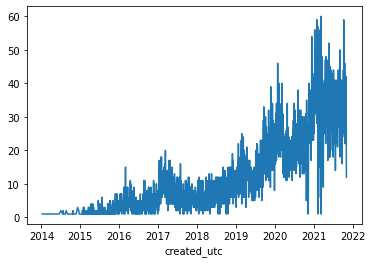

In [59]:
time_plot = papers.groupby(md_submissions['created_utc'].dt.date)['posts'].count()
time_plot.plot()

**Length of submissions**

In [21]:
papers['word_len'] = papers['posts'].map(lambda x: x.split()).str.len()

In [22]:
display(papers['word_len'].describe())

count    30960.000000
mean       458.656686
std        774.583361
min          1.000000
25%         97.000000
50%        235.000000
75%        519.000000
max      40733.000000
Name: word_len, dtype: float64

In [83]:
import re

papers['posts_processed'] = \
papers['posts'].map(lambda x: re.sub('[,\.!?]','',x))
papers['posts_processed'] = \
papers['posts_processed'].map(lambda x: x.lower())
papers['posts_processed'].head()

<>:4: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
/var/folders/2y/cb61b6kn4q917mgql1yd1w5w0000gn/T/ipykernel_1254/1525711042.py:4: DeprecationWarning: invalid escape sequence \.
  papers['posts'].map(lambda x: re.sub('[,\.!?]','',x))


0    dosage liverty caps probbly a common question ...
1    psilocybin mushroom how do you find out if mic...
2    can truffles change their effects after they g...
3    microdosing to stop overconsuming cannabis i a...
4    how to start microdosing  hi everyone\n\ni'm c...
Name: posts_processed, dtype: object

In [84]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guneetsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
            if word not in stop_words] for doc in texts]

In [ ]:
data = papers.posts_processed.values.tolist()
data_words = list(sent_to_words(data))

In [ ]:

# ,'microdosing','wwwstop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https','microdosing','wwwredditcom','microdose'])

In [ ]:
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['dosage', 'liverty', 'caps', 'probbly', 'common', 'question', 'whats', 'daily', 'dose', 'libirty', 'caps', 'many']


In [85]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [86]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
            if word not in stop_words] for doc in texts]

In [87]:
data = papers.posts_processed.values.tolist()
data_words = list(sent_to_words(data))

In [88]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https','microdosing','wwwredditcom','microdose'])
# ,'microdosing','wwwredditcom','would','much','dose','md','day','get','people','take','need','know','make','way','lot','life','days','want','could','also'

In [89]:
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['dosage', 'liverty', 'caps', 'probbly', 'common', 'question', 'whats', 'daily', 'dose', 'libirty', 'caps', 'many']


In [90]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [91]:
from gensim.models import Word2Vec

In [92]:
from pprint import pprint

num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"like" + 0.009*"lsd" + 0.008*"would" + 0.007*"day" + 0.007*"much" + '
  '0.007*"dose" + 0.006*"get" + 0.006*"time" + 0.006*"feel" + 0.006*"also"'),
 (1,
  '0.009*"like" + 0.007*"would" + 0.007*"lsd" + 0.007*"dose" + 0.006*"take" + '
  '0.006*"time" + 0.005*"day" + 0.005*"feel" + 0.005*"get" + 0.005*"know"'),
 (2,
  '0.009*"day" + 0.008*"like" + 0.008*"dose" + 0.008*"would" + 0.007*"days" + '
  '0.007*"feel" + 0.006*"time" + 0.006*"really" + 0.006*"much" + 0.006*"lsd"'),
 (3,
  '0.012*"like" + 0.009*"dose" + 0.008*"feel" + 0.007*"get" + 0.007*"would" + '
  '0.006*"take" + 0.006*"good" + 0.006*"day" + 0.005*"one" + 0.005*"time"'),
 (4,
  '0.009*"like" + 0.009*"lsd" + 0.006*"get" + 0.006*"dose" + 0.006*"also" + '
  '0.006*"really" + 0.005*"day" + 0.005*"feel" + 0.005*"much" + 0.005*"take"')]


In [93]:
import pyLDAvis.gensim_models

In [94]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.006666  0.001092       1        1  28.331270
2      0.001396  0.002367       2        1  26.008959
0     -0.004842 -0.002366       3        1  19.179588
4     -0.004464  0.004579       4        1  14.641372
1      0.001245 -0.005672       5        1  11.838810, topic_info=       Term          Freq         Total Category  logprob  loglift
131     lsd  44409.000000  44409.000000  Default  30.0000  30.0000
236    much  36739.000000  36739.000000  Default  29.0000  29.0000
36     like  66868.000000  66868.000000  Default  28.0000  28.0000
13     also  33444.000000  33444.000000  Default  27.0000  27.0000
35     know  30585.000000  30585.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
202   first   2580.801735  23214.325561   Topic5  -5.7522  -0.0629
69     want   2479.272209  21682.840033   Topic5  -5.7924  -0.0348
45   people   2835.489234  29270.697509   Topic5  -5.6581  -0.2006
284      ug   2626.575027  25875.196669   Topic5  -5.7347  -0.1538
283     try   2382.573224  24204.053955   Topic5  -5.8322  -0.1846

[445 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
86757      2  0.814753  abacusbatesedu
520        1  0.288769            able
520        2  0.257573            able
520        3  0.163389            able
520        4  0.101595            able
...      ...       ...             ...
46168      2  0.635954            zxqe
22661      1  0.788284             zyg
72074      2  0.729042             µgs
85770      1  0.196905             महत
85770      4  0.590715             महत

[908 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 5, 2])